## A short guide and example to run fingerprint

This notebook show how to use our implementation of the “fingerprinting approach” based on the Clarke and Minella (2016) method. The proposed alternative approach allows calculating the proportions of each source in the composition of suspended sediment present in rivers and measuring the increase in uncertainty when reducing the number of samples.
To do this, use the following:

The first step is to import the fingerprinting python module:

In [1]:
from fingerprint import Fingerprint

We need to create a fingerprinting object instance and to import the data file:

In [2]:
fp = Fingerprint("sampledata.xlsx")

In the next cell we can print some information about the dataset for:

CB = Channel Banks

UR = Unpaved Roads 

CF = Crop Fields

Y = Suspended Sediment 


In [3]:
fp.infos()

Sheet name: g_Source(CB)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 9
--
Sheet name: g_Source(UR)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 9
--
Sheet name: g_Source(CF)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 20
--
Sheet name: Sediment(Y)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 24
--


In [4]:
nsample=[]
nsample = fp.nsample(nsample)
print('nsample', nsample)


nCB = nsample[0]  # max 9
nUR = nsample[1]  # max 9
nCF = nsample[2] # max 20
nY = nsample[3] # max 24

sY,sCB,sUR,sCF = fp.randon_choice(nY, nCB, nUR, nCF)

# Run the models for all samples and solver options= 0 or 1 or 2
P = fp.run(sY,sCB,sUR,sCF, solve=2)
print(P.shape)

nsample [ 9  9 20 24]
(3, 5843)


Show de results for P1 and P2.

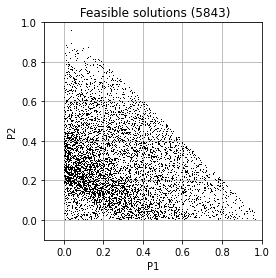

In [5]:
fp.plot2D(P[0:2], title = " Feasible solutions")

Cloud Proportions: The confidence region ($95\%$) calculated from the set of feasible solutions for all samples

Área: 0.4177986499815255


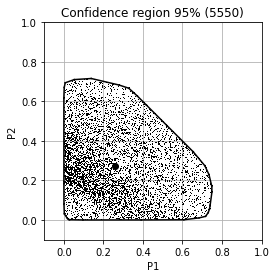

In [6]:
P = fp.confidence_region(P[0:2], p = 95, spacedist = "mahalanobis")
fp.plot2D(P, mean=True, convex_hull = True, title = "Confidence region 95%")

Run multiples times and store for each number of resample in nYs list 

The coefficient of variation CVYs

Cloud Proportions: The confidence region (95%) calculated from the set of feasible solutions each reduction of nY samples

Samples sizes: [2, 4, 8, 12, 16, 20, 24]
Sample size: 2
Área: 0.41965208769385604


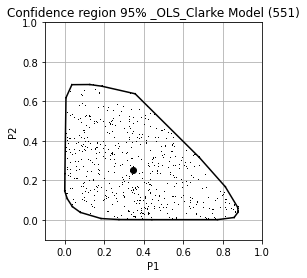

Área: 0.3874587489196534


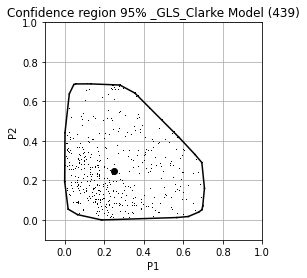

Sample size: 4
Sample size: 8
Sample size: 12
Área: 0.39784804153118974


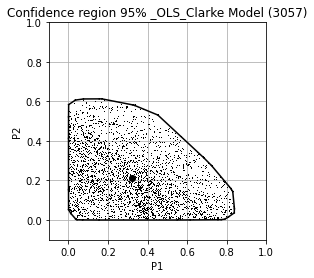

Área: 0.40990705400062966


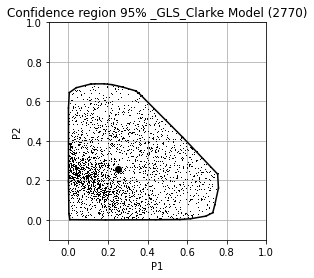

Sample size: 16
Sample size: 20
Área: 0.3926475274722276


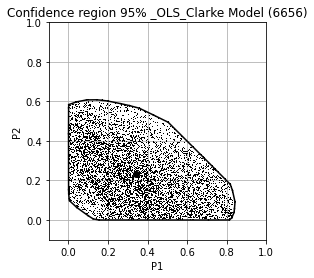

Área: 0.41411051058551007


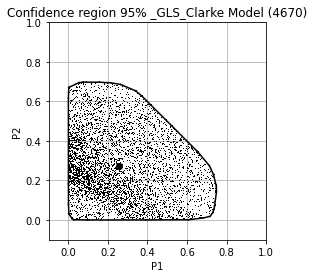

Sample size: 24
--------------------------------------------------------------
Solve_0
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
--------------------------------------------------------------
2 	0.364 	0.041 	3240 	551 	0.347 	0.255 	0.398
4 	0.377 	0.028 	6480 	1372 	0.338 	0.189 	0.473
8 	0.389 	0.017 	12960 	3261 	0.375 	0.204 	0.421
12 	0.398 	0.011 	19440 	3057 	0.322 	0.212 	0.467
16 	0.401 	0.006 	25920 	4553 	0.337 	0.246 	0.417
20 	0.401 	0.005 	32400 	6656 	0.340 	0.232 	0.428
24 	0.403 	0.000 	38880 	7722 	0.341 	0.238 	0.420
--------------------------------------------------------------
Áreas médias: [0.364 0.377 0.389 0.398 0.401 0.401 0.403]
Desvios padrão: [11.379  7.382  4.248  2.845  1.579  1.322  0.   ]
--------------------------------------------------------------
Solve_1
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
--------------------------------------------------------------
2 	0.364 	0.041 	3240 	551 	0.347 	0.255 	0.398
4 	0.377 	0.028 	6480

In [7]:
nYs = [2,4,8,12,16,20,24]

Ycv0, Ycv1, Ycv2 = fp.multi_runs(50, nYs,nCB,nUR,nCF, plots2D=[2,12,20])


In [8]:
X1_0 = nYs.copy()
Y1_0 = Ycv0.copy()

X1_1 = nYs.copy()
Y1_1 = Ycv1.copy()

X1_2 = nYs.copy()
Y1_2 = Ycv2.copy()

Plots options

In [10]:
import matplotlib.pyplot as plt

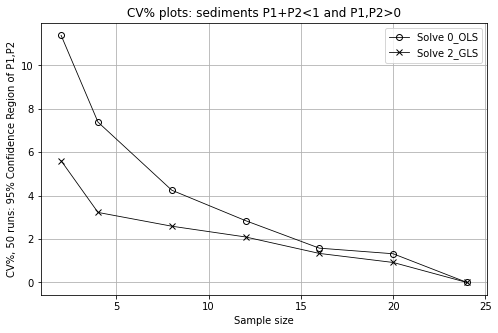

In [11]:
fig = plt.figure(figsize=(8, 5))
plt.plot(X1_0, Y1_0, "ko-",
         #X1_1, Y1_1, "ks-",
         X1_2, Y1_2, "kx-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('CV% plots: sediments P1+P2<1 and P1,P2>0')
plt.xlabel('Sample size')
plt.ylabel('CV%, 50 runs: 95% Confidence Region of P1,P2')
plt.legend(['Solve 0_OLS',
            #'Solve 1', 
            'Solve 2_GLS'], loc='upper right')
plt.savefig('Coeff_Var_nY.png')

plt.grid()
plt.show()

Run multiples times and store for each number of resample in nCFs list 

The coefficient of variation CFcv

Cloud Proportions: The confidence region (95%) calculated from the set of feasible solutions each reduction of nCF samples

In [12]:
nCFs = [2,4,8,12,16,20]
CFcv0, CFcv1, CFcv2 = fp.multi_runs(50, nY,nCB,nUR,nCFs)

Samples sizes: [2, 4, 8, 12, 16, 20]
Sample size: 2
Sample size: 4
Sample size: 8
Sample size: 12
Sample size: 16
Sample size: 20
--------------------------------------------------------------
Solve_0
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
--------------------------------------------------------------
2 	0.359 	0.044 	3888 	904 	0.359 	0.228 	0.413
4 	0.388 	0.018 	7776 	1236 	0.396 	0.239 	0.365
8 	0.392 	0.017 	15552 	2812 	0.342 	0.222 	0.436
12 	0.399 	0.011 	23328 	4524 	0.336 	0.237 	0.427
16 	0.401 	0.007 	31104 	6145 	0.326 	0.230 	0.444
20 	0.403 	0.000 	38880 	7722 	0.341 	0.238 	0.420
--------------------------------------------------------------
Áreas médias: [0.359 0.388 0.392 0.399 0.401 0.403]
Desvios padrão: [12.31   4.527  4.459  2.818  1.784  0.   ]
--------------------------------------------------------------
Solve_1
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
--------------------------------------------------------------
2 	0.359 	0.044 	38

In [13]:
X2_0 = nCFs.copy()
Y2_0 = CFcv0.copy()

X2_1 = nCFs.copy()
Y2_1 = CFcv0.copy()

X2_2 = nCFs.copy()
Y2_2 = CFcv2.copy()

Figure options

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 5))
plt.plot(X2_0, Y2_0, "ko-",
         #X2_1, Y2_1, "ks-",
         X2_2, Y2_2, "kx-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('CV% plots: sediments P1+P2<1 and P1,P2>0')
plt.xlabel('Sample size')
plt.ylabel('CV%, 50 runs: 95% Confidence Region of P1,P2')
plt.legend(['Solve 0',
            #'Solve 1', 
            'Solve 2'], loc='upper right')
plt.savefig('Coeff_Var_nCF.png')

plt.grid()
plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 5))
plt.plot(X1_0, Y1_0, "ko-",
         X2_0, Y2_0, "ks-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('Gráfico do coeficiente de variação em função do número de amostras')
plt.xlabel('Numero de amostras')
plt.ylabel('CV%, 50 repetições, região de confiança de 95% para P1 e P2')
plt.legend(['Variando Y',
            #'OLS3x3', 
            'Variando L'], loc='upper right')
plt.savefig('CVvsAmostras.png')

plt.grid()
plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 5))
plt.plot(X1_2, Y1_2, "ko-",
         X2_2, Y2_2, "ks-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('CV% plots: sediments P1+P2<1 and P1,P2>0')
plt.xlabel('Sample size')
plt.ylabel('CV%, 50 runs: 95% Confidence Region of P1,P2')
plt.legend(['Variando Y',
            'Variando L'], loc='upper right')
plt.savefig('P1+P2<1_and_P1,P2>0.png')

plt.grid()
plt.show()